In [161]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [162]:
#Load the we_fn_use_c_marketing_customer_value_analysis.csv into the variable customer_df.

In [163]:
customer_df = pd.read_csv('/Users/segre/OneDrive/Desktop/IRONHACK/21.02.01/lab-cleaning-numerical-data/files_for_lab/we_fn_use_c_marketing_customer_value_analysis.csv')


In [164]:
#First look at its main features (head, shape, info).

In [165]:
customer_df.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [166]:
customer_df.describe()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,8004.940475,37657.380009,93.219291,15.097000,48.064594,0.384388,2.966170,434.088794
std,6870.967608,30379.904734,34.407967,10.073257,27.905991,0.910384,2.390182,290.500092
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,3994.251794,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,272.258244
50%,5780.182197,33889.500000,83.000000,14.000000,48.000000,0.000000,2.000000,383.945434
75%,8962.167041,62320.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.514839
max,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678


In [167]:
customer_df.shape

(9134, 24)

In [168]:
#Rename the columns so they follow the PE8 (snake case).

In [197]:
customer_df.columns = list(map(lambda x: x.lower().replace(' ', '_'),customer_df.columns))

In [170]:
customer_df.head()

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [171]:
customer_df = customer_df.rename({'employmentstatus': 'employment_status'}, axis='columns')

In [172]:
#Change effective to date column to datetime format.

In [173]:
customer_df['effective_to_date'] = pd.to_datetime(customer_df['effective_to_date'], format='%m/%d/%y')

In [174]:
#Check NaN values per column.

<AxesSubplot:>

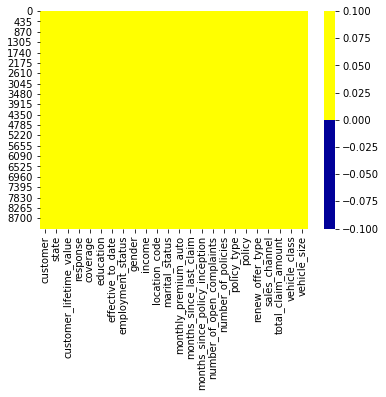

In [175]:
cols = customer_df.columns[:30] # first 30 columns
colours = ['#000099', '#ffff00'] # specify the colours - yellow is missing. blue is not missing.
sns.heatmap(customer_df[cols].isnull(), cmap=sns.color_palette(colours))

In [176]:
for col in customer_df.columns:
    pct_missing = np.mean(customer_df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

customer - 0%
state - 0%
customer_lifetime_value - 0%
response - 0%
coverage - 0%
education - 0%
effective_to_date - 0%
employment_status - 0%
gender - 0%
income - 0%
location_code - 0%
marital_status - 0%
monthly_premium_auto - 0%
months_since_last_claim - 0%
months_since_policy_inception - 0%
number_of_open_complaints - 0%
number_of_policies - 0%
policy_type - 0%
policy - 0%
renew_offer_type - 0%
sales_channel - 0%
total_claim_amount - 0%
vehicle_class - 0%
vehicle_size - 0%


In [177]:
customer_df.dtypes

customer                                 object
state                                    object
customer_lifetime_value                 float64
response                                 object
coverage                                 object
education                                object
effective_to_date                datetime64[ns]
employment_status                        object
gender                                   object
income                                    int64
location_code                            object
marital_status                           object
monthly_premium_auto                      int64
months_since_last_claim                   int64
months_since_policy_inception             int64
number_of_open_complaints                 int64
number_of_policies                        int64
policy_type                              object
policy                                   object
renew_offer_type                         object
sales_channel                           

In [178]:
customer_df.head()

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employment_status,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2011-02-24,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,2011-01-31,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2011-02-19,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,2011-01-20,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2011-02-03,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [179]:
customer_df1 = customer_df.drop(['customer'], axis=1)

In [180]:
#check each single value per column and see what to do about categoricals and numericals

In [ ]:
#def my_discrete_data(data):
    #discrete_data = pd.DataFrame({'A': []})
    #for val in data.columns:
     #   if (data[val].dtype == 'int64'):
      #          discrete_data[val] = data[val]
        #        data.drop([val],axis = 1)
     #discrete_data.drop(['A'],axis = 1)
   #  return discrete_data
 #my_discrete_data(numeric_data)
 #print(my_discrete_data.dtypes, numeric_data.dtypes)


In [181]:
import numpy as np
for col in list(customer_df1):
    print(col)
    print(np.sort(customer_df1[col].unique()))

state
['Arizona' 'California' 'Nevada' 'Oregon' 'Washington']
customer_lifetime_value
[ 1898.007675  1898.683686  1904.000852 ... 73225.95652  74228.51604
 83325.38119 ]
response
['No' 'Yes']
coverage
['Basic' 'Extended' 'Premium']
education
['Bachelor' 'College' 'Doctor' 'High School or Below' 'Master']
effective_to_date
['2011-01-01T00:00:00.000000000' '2011-01-02T00:00:00.000000000'
 '2011-01-03T00:00:00.000000000' '2011-01-04T00:00:00.000000000'
 '2011-01-05T00:00:00.000000000' '2011-01-06T00:00:00.000000000'
 '2011-01-07T00:00:00.000000000' '2011-01-08T00:00:00.000000000'
 '2011-01-09T00:00:00.000000000' '2011-01-10T00:00:00.000000000'
 '2011-01-11T00:00:00.000000000' '2011-01-12T00:00:00.000000000'
 '2011-01-13T00:00:00.000000000' '2011-01-14T00:00:00.000000000'
 '2011-01-15T00:00:00.000000000' '2011-01-16T00:00:00.000000000'
 '2011-01-17T00:00:00.000000000' '2011-01-18T00:00:00.000000000'
 '2011-01-19T00:00:00.000000000' '2011-01-20T00:00:00.000000000'
 '2011-01-21T00:00:00.0000

In [182]:
customer_df1['effective_to_date'] = customer_df1['effective_to_date'].dt.isocalendar().week

In [183]:
customer_df1.head()

,state,customer_lifetime_value,response,coverage,education,effective_to_date,employment_status,gender,income,location_code,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,Washington,2763.519279,No,Basic,Bachelor,8,Employed,F,56274,Suburban,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,Arizona,6979.535903,No,Extended,Bachelor,5,Unemployed,F,0,Suburban,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,Nevada,12887.431650,No,Premium,Bachelor,7,Employed,F,48767,Suburban,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,California,7645.861827,No,Basic,Bachelor,3,Unemployed,M,0,Suburban,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,Washington,2813.692575,No,Basic,Bachelor,5,Employed,M,43836,Rural,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [184]:
numericals = customer_df1.select_dtypes(exclude = 'object')

In [185]:
numericals.head()

,customer_lifetime_value,effective_to_date,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,2763.519279,8,56274,69,32,5,0,1,384.811147
1,6979.535903,5,0,94,13,42,0,8,1131.464935
2,12887.431650,7,48767,108,18,38,0,2,566.472247
3,7645.861827,3,0,106,18,65,0,7,529.881344
4,2813.692575,5,43836,73,12,44,0,1,138.130879


In [186]:
categoricals = customer_df1.select_dtypes(include = 'object')

In [188]:
dis_curr = pd.DataFrame()
for col in numericals.columns:
    if len(numericals[col].unique())<10:
        dis_curr[col]=numericals[col]
        numericals = numericals.drop(col, axis=1)

In [189]:
dis_curr.head()

,number_of_open_complaints,number_of_policies
0,0,1
1,0,8
2,0,2
3,0,7
4,0,1


In [190]:
numericals.head()

,customer_lifetime_value,effective_to_date,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,total_claim_amount
0,2763.519279,8,56274,69,32,5,384.811147
1,6979.535903,5,0,94,13,42,1131.464935
2,12887.431650,7,48767,108,18,38,566.472247
3,7645.861827,3,0,106,18,65,529.881344
4,2813.692575,5,43836,73,12,44,138.130879


In [ ]:
#Get categorical features.

In [195]:
categoricals.head()

,state,response,coverage,education,employment_status,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


In [ ]:
#For the categorical data, check if there is some kind of text in a variable so we would need to clean it.

In [194]:
import numpy as np
for col in list(categoricals):
    print(col)
    print(np.sort(categoricals[col].unique()))

state
['Arizona' 'California' 'Nevada' 'Oregon' 'Washington']
response
['No' 'Yes']
coverage
['Basic' 'Extended' 'Premium']
education
['Bachelor' 'College' 'Doctor' 'High School or Below' 'Master']
employment_status
['Disabled' 'Employed' 'Medical Leave' 'Retired' 'Unemployed']
gender
['F' 'M']
location_code
['Rural' 'Suburban' 'Urban']
marital_status
['Divorced' 'Married' 'Single']
policy_type
['Corporate Auto' 'Personal Auto' 'Special Auto']
policy
['Corporate L1' 'Corporate L2' 'Corporate L3' 'Personal L1' 'Personal L2'
 'Personal L3' 'Special L1' 'Special L2' 'Special L3']
renew_offer_type
['Offer1' 'Offer2' 'Offer3' 'Offer4']
sales_channel
['Agent' 'Branch' 'Call Center' 'Web']
vehicle_class
['Four-Door Car' 'Luxury Car' 'Luxury SUV' 'SUV' 'Sports Car'
 'Two-Door Car']
vehicle_size
['Large' 'Medsize' 'Small']


In [ ]:
#everything looks fine for the texts